# Process of results

First some imports

In [15]:
import os
import os.path

from gravann.input import csv_reader
from gravann.functions import unit_conversion

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import ast
import warnings
warnings.filterwarnings('ignore')

Next, we read all finalized CSV files from the given `input_directory`:

In [16]:
input_directory = Path("./results/cg")
output_directory = Path("./results/cg")

# Error of interest
error_of_interest = "relRMSE"

df = csv_reader.read_result_csv(
    input_directory,
    include=["results.csv"],
    exclude=["checkpoint", "validation"],
    files=[
        "./results/cg/polyhedral-total-cg-adaptive-noise-0/results_checkpoint_0022.csv",
        "./results/cg/polyhedral-total-cg-adaptive-noise-1/results_checkpoint_0020.csv"
    ]
)
analysis_df = df.copy()

Let's look at the initial result

In [17]:
df

,sample,output_folder,run_id,plotting_points,seed,ground_truth,loss,batch_size,learning_rate,iterations,...,Normalized L1 Loss@High Altitude,Normalized Relative Component Loss@High Altitude,RMSE@High Altitude,relRMSE@High Altitude,Normalized L1 Loss@Low Altitude,Normalized Relative Component Loss@Low Altitude,RMSE@Low Altitude,relRMSE@Low Altitude,pretrained_model,low_resolution
0,churyumov-gerasimenko,results/polyhedral-total-seed-1999,0,2500,1999,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,0.026418,0.033961,0.374827,0.165426,0.054045,0.057224,0.391516,0.152814,NaN,NaN
1,churyumov-gerasimenko,results/polyhedral-total-seed-1999,1,2500,1999,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,0.631426,0.789039,2.486944,1.222109,0.603926,0.652308,2.224196,0.800178,NaN,NaN
2,churyumov-gerasimenko,results/polyhedral-total-seed-1999,2,2500,1999,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,0.523093,0.656178,2.153486,0.906739,0.599081,0.645885,2.247042,0.812963,NaN,NaN
3,churyumov-gerasimenko,results/polyhedral-total-seed-1999,3,2500,1999,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,0.043948,0.055608,0.486524,0.193223,0.085930,0.092383,0.609533,0.216485,NaN,NaN
4,churyumov-gerasimenko,results/polyhedral-total-seed-1999,4,2500,1999,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,0.710257,0.890139,2.648758,1.234736,0.750726,0.810724,2.634546,0.946690,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,churyumov-gerasimenko,results/polyhedral-total-cg-adaptive-noise-1,16,2500,9,mascon,normalized_L1_loss,1000,0.0001,10000,...,0.680695,0.849767,2.633723,1.244475,0.627847,0.678234,2.319033,0.836126,NaN,False
400,churyumov-gerasimenko,results/polyhedral-total-cg-adaptive-noise-1,17,2500,9,mascon,normalized_L1_loss,1000,0.0001,10000,...,0.665662,0.832363,2.590735,1.237482,0.589744,0.637223,2.229158,0.804519,NaN,False
401,churyumov-gerasimenko,results/polyhedral-total-cg-adaptive-noise-1,18,2500,37,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,0.034717,0.043510,0.222327,0.097599,0.069736,0.074636,0.470316,0.158136,NaN,False
402,churyumov-gerasimenko,results/polyhedral-total-cg-adaptive-noise-1,19,2500,37,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,0.568186,0.703714,2.369640,1.123160,0.564686,0.609747,2.191067,0.798066,NaN,False


And save the unmodified concatenated DataFrame to a file

In [18]:
filename = "total_results_cg.csv"
df.to_csv(output_directory.joinpath(filename))

# Processing and Data Visualization

First, we drop every uninteresting parameter and focus on the selected error. Further, we rember the used altitudes for validation.

In [19]:
interesting_columns = ["sample", "seed", "ground_truth", "sample_domain", "noise"]
interesting_columns.extend([col for col in df if col.startswith(error_of_interest)])

analysis_df = analysis_df[interesting_columns]
analysis_df = analysis_df.fillna("None")
analysis_df

,sample,seed,ground_truth,sample_domain,noise,relRMSE@Altitude_0,relRMSE@Altitude_1,relRMSE@Altitude_2,relRMSE@Altitude_3,relRMSE@Altitude_4,relRMSE@Altitude_5,relRMSE@Altitude_6,relRMSE@Altitude_7,relRMSE@Altitude_8,relRMSE@Altitude_9,relRMSE@High Altitude,relRMSE@Low Altitude
0,churyumov-gerasimenko,1999,polyhedral,"[0.0, 1.0]",[''],1.211786,0.096258,0.071534,0.017997,0.010547,0.003016,0.002236,0.000319,0.000166,0.000035,0.165426,0.152814
1,churyumov-gerasimenko,1999,polyhedral,"[1.0, 3.0]",[''],1.101157,0.778490,0.830549,0.859319,1.455196,0.208630,0.006895,0.000374,0.000192,0.000040,1.222109,0.800178
2,churyumov-gerasimenko,1999,polyhedral,"[3.0, 5.0]",[''],0.796810,0.716014,1.046299,0.619478,1.178019,0.296733,0.027870,0.000179,0.000092,0.000019,0.906739,0.812963
3,churyumov-gerasimenko,1999,polyhedral,"[0.0, 1.0]","['gaussian', 0.0, 0.146731]",0.206812,0.174840,0.122886,0.059846,0.035955,0.040054,0.024599,0.002951,0.001561,0.000331,0.193223,0.216485
4,churyumov-gerasimenko,1999,polyhedral,"[1.0, 3.0]","['gaussian', 0.0, 0.146731]",1.159206,1.000764,1.002049,0.822109,1.107080,0.540697,0.224948,0.015896,0.007194,0.001413,1.234736,0.946690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,churyumov-gerasimenko,9,mascon,"[1.0, 3.0]","['adaptive_gaussian_noise', 0.001]",1.108676,0.832323,1.082490,0.712485,0.601098,0.293441,0.013597,0.000139,0.000068,0.000014,1.244475,0.836126
400,churyumov-gerasimenko,9,mascon,"[3.0, 5.0]","['adaptive_gaussian_noise', 0.001]",1.432717,0.656874,0.728819,0.631736,1.202845,0.257585,0.024517,0.000212,0.000113,0.000024,1.237482,0.804519
401,churyumov-gerasimenko,37,polyhedral,"[0.0, 1.0]","['adaptive_gaussian_noise', 0.1]",0.155827,0.100072,0.087556,0.046196,0.028709,0.015553,0.010849,0.000528,0.000217,0.000038,0.097599,0.158136
402,churyumov-gerasimenko,37,polyhedral,"[1.0, 3.0]","['adaptive_gaussian_noise', 0.1]",0.725202,1.500979,0.833548,0.690183,0.556423,0.286621,0.028196,0.002967,0.001561,0.000324,1.123160,0.798066


Time to replace the altitudes and make them more readable:

In [20]:
ALTITUDES = ast.literal_eval(df.at[0, "validation_sampling_altitudes"])
print(ALTITUDES)
print(unit_conversion.convert_altitude("churyumov-gerasimenko", np.array([1.0, 3.0, 5.0]), unit='km'))

[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]
[ 3.12660645  9.37981934 15.63303223]


In [21]:
unit_conversion.convert_pandas_altitudes(analysis_df, ALTITUDES, convert_height=False, only_height=True)
analysis_df

,sample,seed,ground_truth,sample_domain,noise,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0,relRMSE@High Altitude,relRMSE@Low Altitude
0,churyumov-gerasimenko,1999,polyhedral,"[0.0, 1.0]",[''],1.211786,0.096258,0.071534,0.017997,0.010547,0.003016,0.002236,0.000319,0.000166,0.000035,0.165426,0.152814
1,churyumov-gerasimenko,1999,polyhedral,"[1.0, 3.0]",[''],1.101157,0.778490,0.830549,0.859319,1.455196,0.208630,0.006895,0.000374,0.000192,0.000040,1.222109,0.800178
2,churyumov-gerasimenko,1999,polyhedral,"[3.0, 5.0]",[''],0.796810,0.716014,1.046299,0.619478,1.178019,0.296733,0.027870,0.000179,0.000092,0.000019,0.906739,0.812963
3,churyumov-gerasimenko,1999,polyhedral,"[0.0, 1.0]","['gaussian', 0.0, 0.146731]",0.206812,0.174840,0.122886,0.059846,0.035955,0.040054,0.024599,0.002951,0.001561,0.000331,0.193223,0.216485
4,churyumov-gerasimenko,1999,polyhedral,"[1.0, 3.0]","['gaussian', 0.0, 0.146731]",1.159206,1.000764,1.002049,0.822109,1.107080,0.540697,0.224948,0.015896,0.007194,0.001413,1.234736,0.946690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,churyumov-gerasimenko,9,mascon,"[1.0, 3.0]","['adaptive_gaussian_noise', 0.001]",1.108676,0.832323,1.082490,0.712485,0.601098,0.293441,0.013597,0.000139,0.000068,0.000014,1.244475,0.836126
400,churyumov-gerasimenko,9,mascon,"[3.0, 5.0]","['adaptive_gaussian_noise', 0.001]",1.432717,0.656874,0.728819,0.631736,1.202845,0.257585,0.024517,0.000212,0.000113,0.000024,1.237482,0.804519
401,churyumov-gerasimenko,37,polyhedral,"[0.0, 1.0]","['adaptive_gaussian_noise', 0.1]",0.155827,0.100072,0.087556,0.046196,0.028709,0.015553,0.010849,0.000528,0.000217,0.000038,0.097599,0.158136
402,churyumov-gerasimenko,37,polyhedral,"[1.0, 3.0]","['adaptive_gaussian_noise', 0.1]",0.725202,1.500979,0.833548,0.690183,0.556423,0.286621,0.028196,0.002967,0.001561,0.000324,1.123160,0.798066


In [22]:
unit_conversion.convert_altitude("churyumov-gerasimenko", np.array(ALTITUDES), unit='m')

array([3.12660645e+00, 1.56330322e+01, 3.12660645e+01, 1.56330322e+02,
       3.12660645e+02, 1.56330322e+03, 3.12660645e+03, 1.56330322e+04,
       3.12660645e+04, 1.56330322e+05])

In [23]:
analysis_df = analysis_df.drop(
    ["sample", "seed", f"{error_of_interest}@High Altitude", f"{error_of_interest}@Low Altitude"], axis=1
)
analysis_df["sample_domain"] = analysis_df["sample_domain"].apply(lambda x: str(x))
analysis_df.groupby(["sample_domain", "noise", "ground_truth"]).mean()

0.001  \
sample_domain noise                                             ground_truth             
[0. 1.]       ['']                                              mascon        0.191870   
                                                                polyhedral    0.279522   
              ['adaptive_gaussian_noise', 0.001]                mascon        0.149288   
                                                                polyhedral    0.130266   
              ['adaptive_gaussian_noise', 0.01]                 mascon        0.140656   
                                                                polyhedral    0.272024   
              ['adaptive_gaussian_noise', 0.1]                  mascon        0.158599   
                                                                polyhedral    0.137153   
              ['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]] mascon        0.287742   
                                                                polyhedral    0.570189   
              ['combined', 0.0, 1.467314, [0.000272, 0.0, 0.0]] mascon        0.528007   
                                                                polyhedral    0.634562   
              ['constant_bias', [0.000272, 0.0, 0.0]]           mascon        0.327714   
                                                                polyhedral    0.223005   
              ['gaussian', 0.0, 0.146731]                       mascon        0.334041   
                                                                polyhedral    0.203604   
              ['gaussian', 0.0, 1.467314]                       mascon        0.601229   
                                                                polyhedral    0.451978   
[1. 3.]       ['']                                              mascon        1.085356   
                                                                polyhedral    1.055796   
              ['adaptive_gaussian_noise', 0.001]                mascon        1.040629   
                                                                polyhedral    0.900709   
              ['adaptive_gaussian_noise', 0.01]                 mascon        0.822491   
                                                                polyhedral    1.274816   
              ['adaptive_gaussian_noise', 0.1]                  mascon        0.709357   
                                                                polyhedral    0.955164   
              ['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]] mascon        1.110893   
                                                                polyhedral    1.160684   
              ['combined', 0.0, 1.467314, [0.000272, 0.0, 0.0]] mascon        1.140437   
                                                                polyhedral    1.270989   
              ['constant_bias', [0.000272, 0.0, 0.0]]           mascon        1.083487   
                                                                polyhedral    1.052532   
              ['gaussian', 0.0, 0.146731]                       mascon        1.010965   
                                                                polyhedral    1.111553   
              ['gaussian', 0.0, 1.467314]                       mascon        1.212952   
                                                                polyhedral    1.252929   
[3. 5.]       ['']                                              mascon        1.053643   
                                                                polyhedral    0.936926   
              ['adaptive_gaussian_noise', 0.001]                mascon        1.207534   
                                                                polyhedral    0.824685   
              ['adaptive_gaussian_noise', 0.01]                 mascon        0.986912   
                                                                polyhedral    1.250930   
              ['adaptive_gaussian_noise', 0.1]                  mascon        1.153542   
                               

Time for plotting. First make the DataFrame wide

In [24]:
str_altitudes = [str(x) for x in ALTITUDES]

dfm = analysis_df.melt(["sample_domain", "noise", "ground_truth"], str_altitudes, var_name="distance", value_name=error_of_interest)

dfm["distance"] = dfm["distance"].apply(lambda x: float(x))
dfm[error_of_interest] = dfm[error_of_interest].apply(lambda x: float(x))
dfm

,sample_domain,noise,ground_truth,distance,relRMSE
0,[0. 1.],[''],polyhedral,0.001,1.211786
1,[1. 3.],[''],polyhedral,0.001,1.101157
2,[3. 5.],[''],polyhedral,0.001,0.796810
3,[0. 1.],"['gaussian', 0.0, 0.146731]",polyhedral,0.001,0.206812
4,[1. 3.],"['gaussian', 0.0, 0.146731]",polyhedral,0.001,1.159206
...,...,...,...,...,...
4035,[1. 3.],"['adaptive_gaussian_noise', 0.001]",mascon,50.000,0.000014
4036,[3. 5.],"['adaptive_gaussian_noise', 0.001]",mascon,50.000,0.000024
4037,[0. 1.],"['adaptive_gaussian_noise', 0.1]",polyhedral,50.000,0.000038
4038,[1. 3.],"['adaptive_gaussian_noise', 0.1]",polyhedral,50.000,0.000324


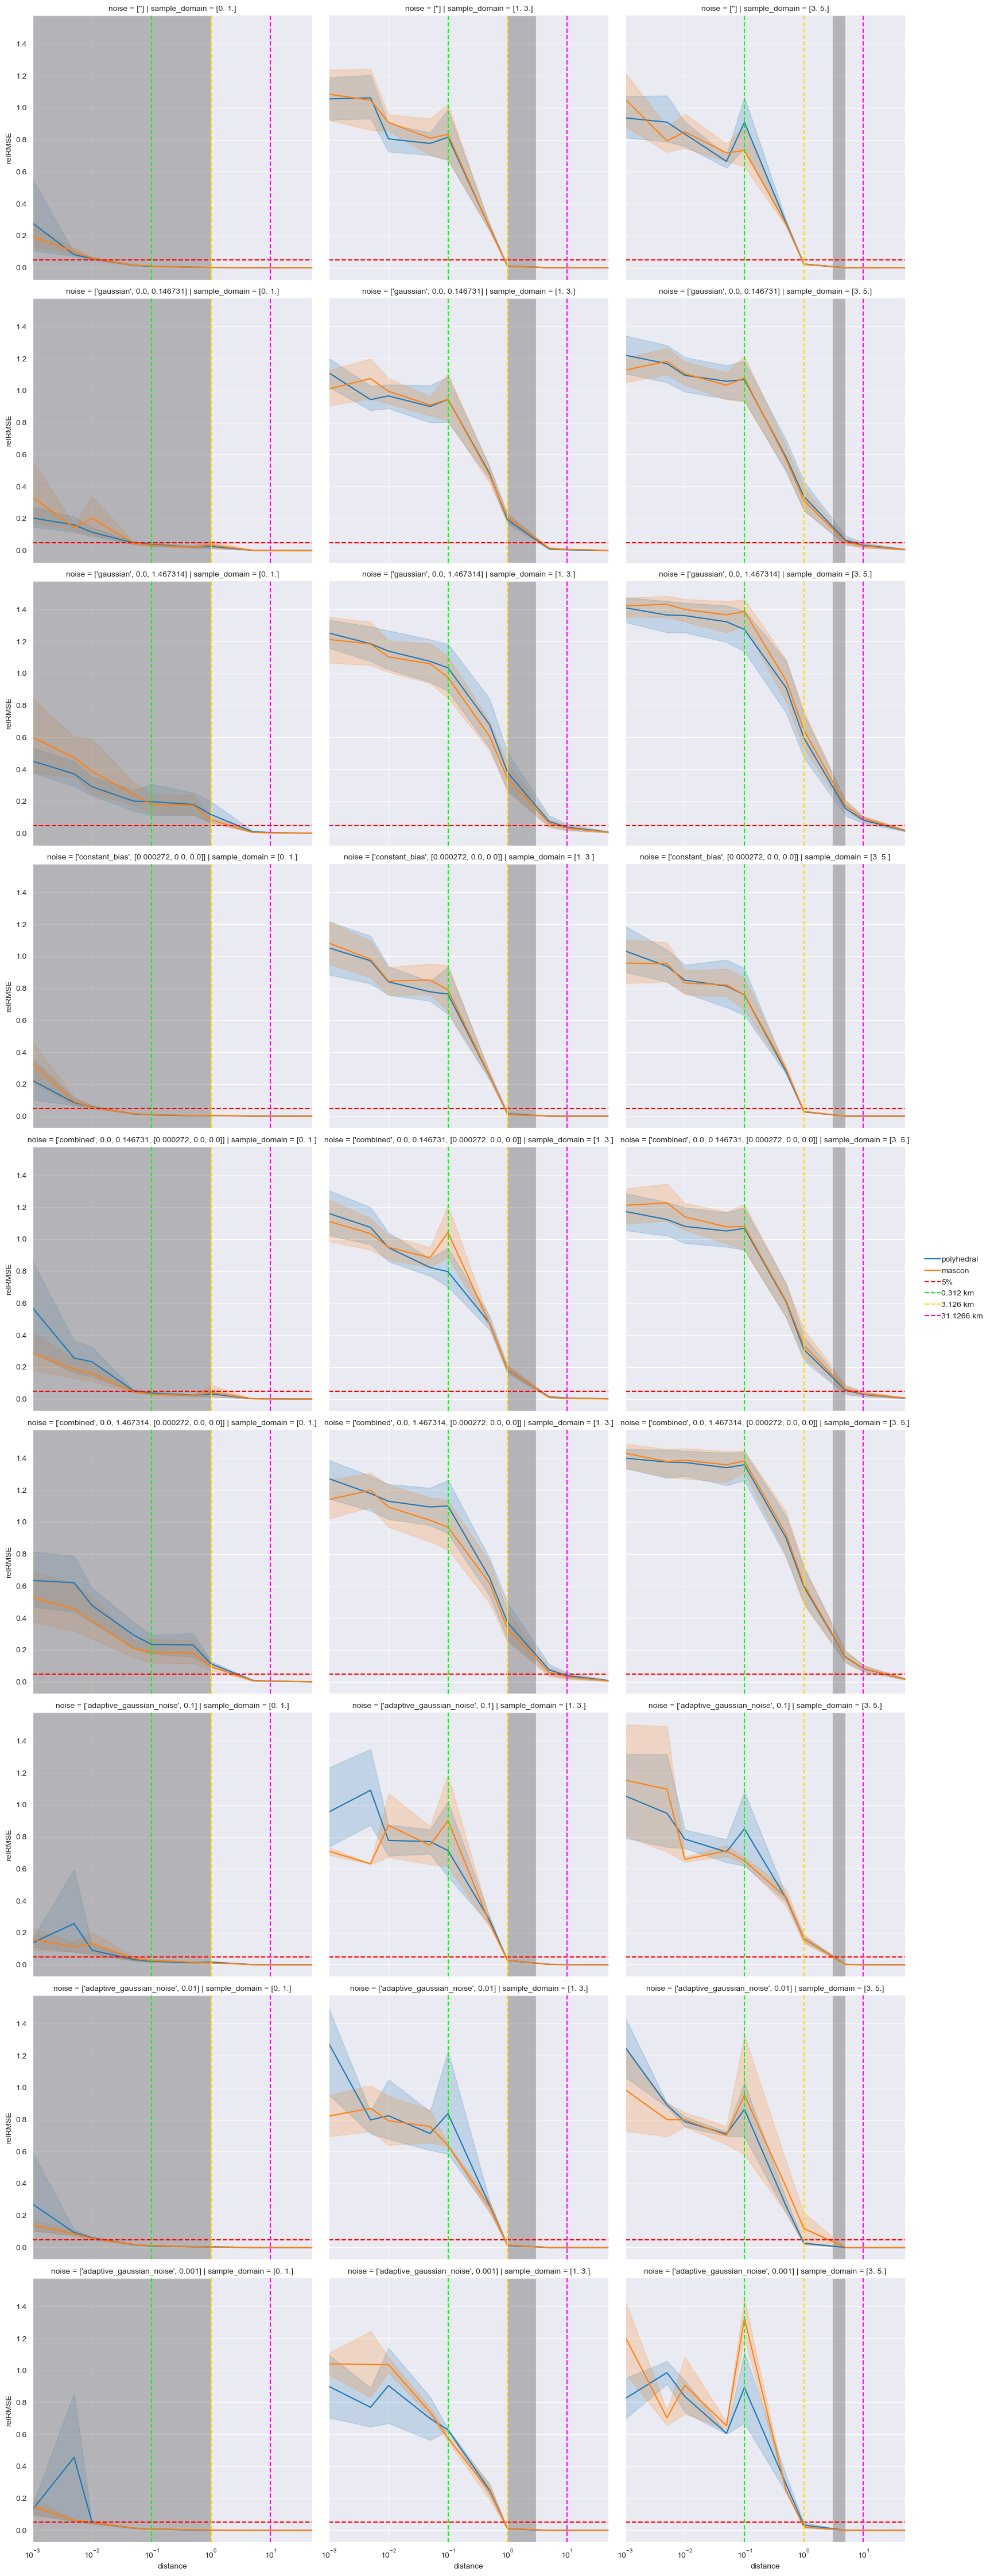

In [25]:
g = sns.relplot(
    data=dfm, kind="line",
    x="distance", y=error_of_interest, col="sample_domain", row="noise",
    hue="ground_truth"
)
g.set(xlim=(0.0, 50.0), xscale='log')
g.map(plt.axhline, y=0.05, ls='--', c='red', label="5%")
g.map(plt.axvline, x=0.1, ls='--', c='lime', label="0.312 km")
g.map(plt.axvline, x=1.0, ls='--', c='gold', label="3.126 km")
g.map(plt.axvline, x=10.0, ls='--', c='fuchsia', label="31.1266 km")

for ax in g.axes[:,0]:
    ax.axvspan(0, 1.0, facecolor='gray', alpha=0.5)
for ax in g.axes[:,1]:
    ax.axvspan(1.0, 3.0, facecolor='gray', alpha=0.5)
for ax in g.axes[:,2]:
    ax.axvspan(3.0, 5.0, facecolor='gray', alpha=0.5)

# g.set_titles(col_template="{col_name} patrons", row_template="{row_name}")
# g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
g.legend.remove()
g.add_legend(handletextpad=0.1)
g.tight_layout()
save_path = os.path.join(output_directory, f"cg_norm_{error_of_interest}_line.png")
g.savefig(save_path, dpi=300)

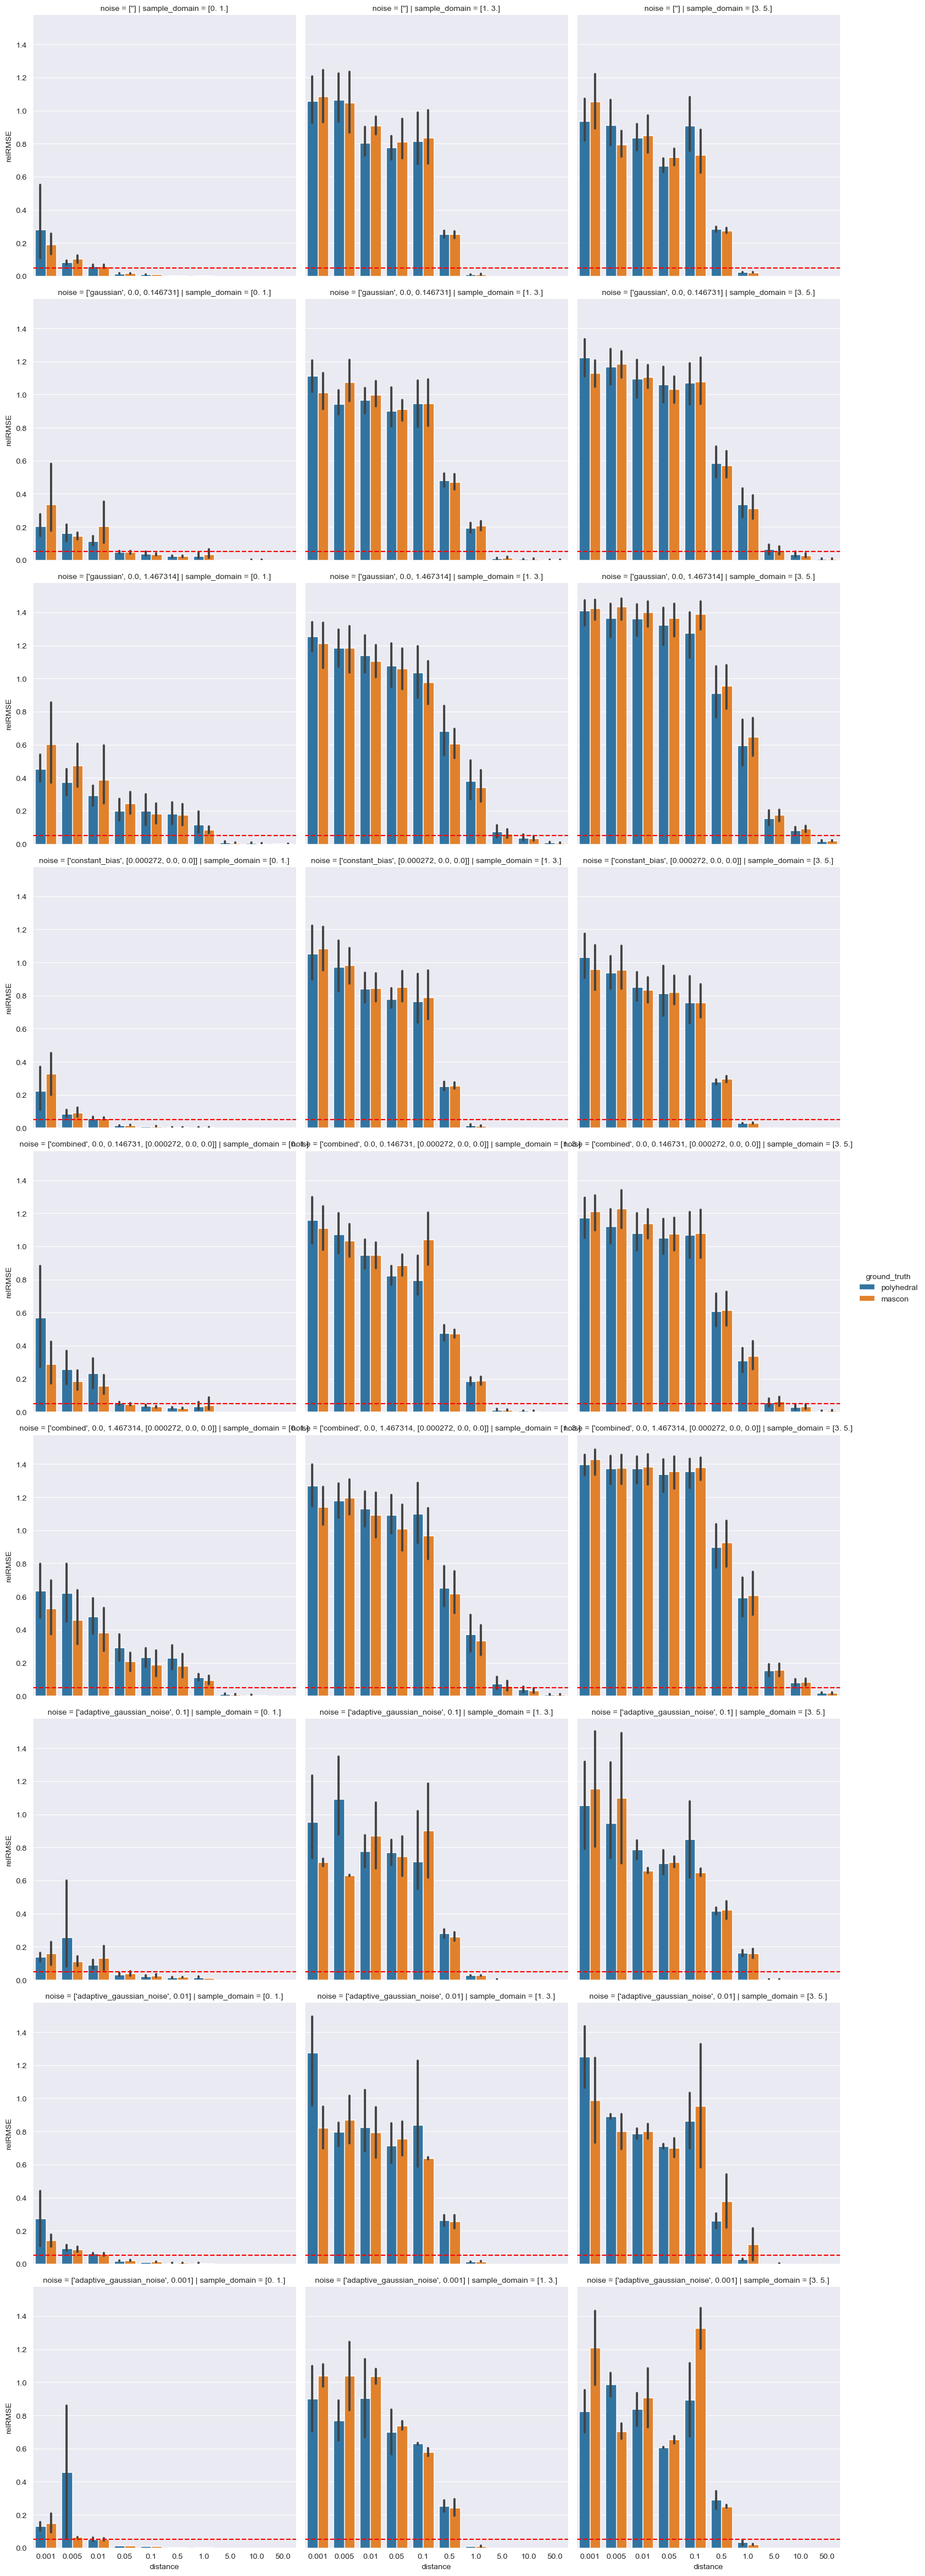

In [26]:
g = sns.catplot(
    data=dfm, kind="bar",
    x="distance", y=error_of_interest, col="sample_domain", row="noise",
    hue="ground_truth"
)
g.map(plt.axhline, y=0.05, ls='--', c='red')
# g.set_titles(col_template="{col_name} patrons", row_template="{row_name}")
# g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
g.tight_layout()
save_path = os.path.join(output_directory, f"cg_norm_{error_of_interest}_bar.png")
g.savefig(save_path, dpi=300)